# Compare models with annotations split by target type

In [5]:
from utils.usage_loader import target_types
from sklearn.model_selection import train_test_split
from metric.calculate import calculate
import pickle
from models.linear import SVM, LinearSVM, LogisticReg
from models.tree import CatBoost, RandomForest, GradientBoosting
from models.baseline import Baseline
import matplotlib.pyplot as plt
from collections import Counter
import warnings

In [6]:
with open('data/usage_loader.pickle', 'rb') as f:
    usage_loader = pickle.load(f)

## Without polynomial features

100
80
371
Type
Baseline
CatBoost
Random forest
Gradient boosting
SVM
Linear SVM
Logistic reg


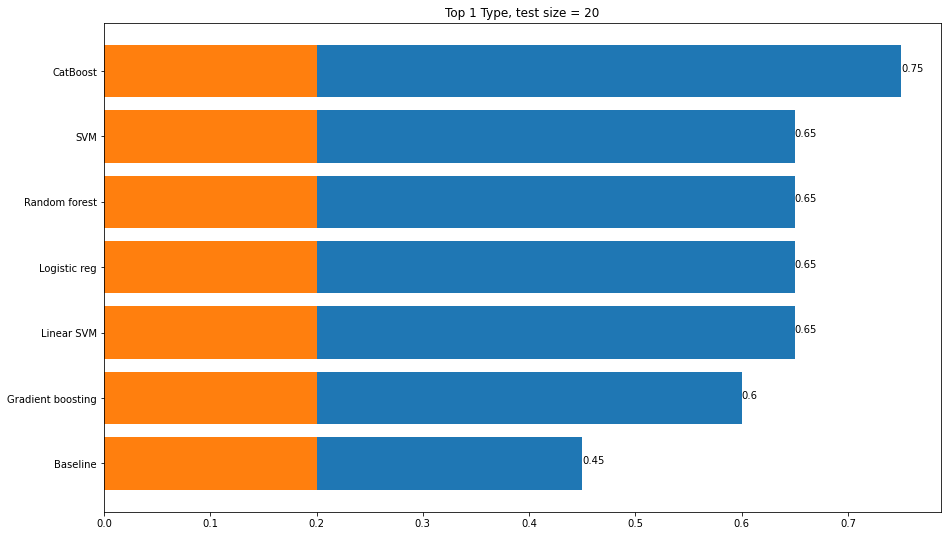

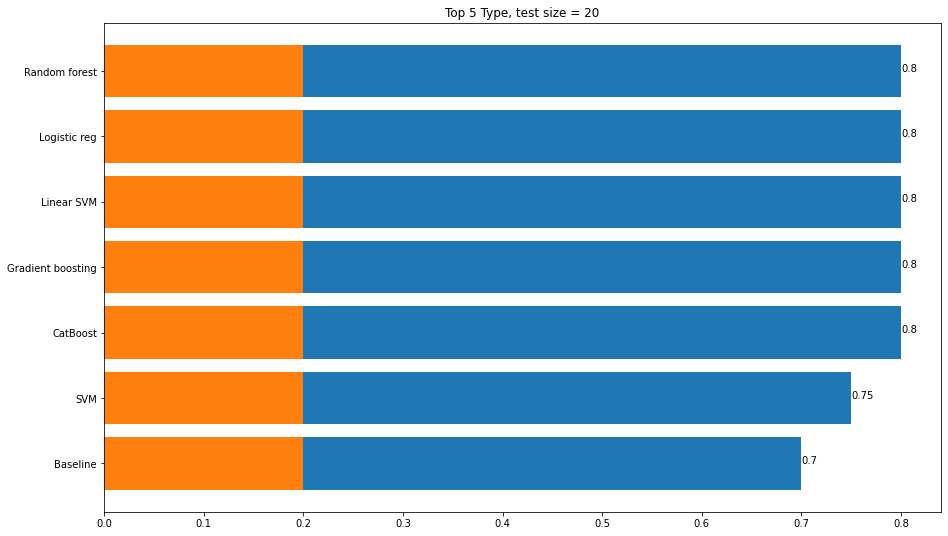

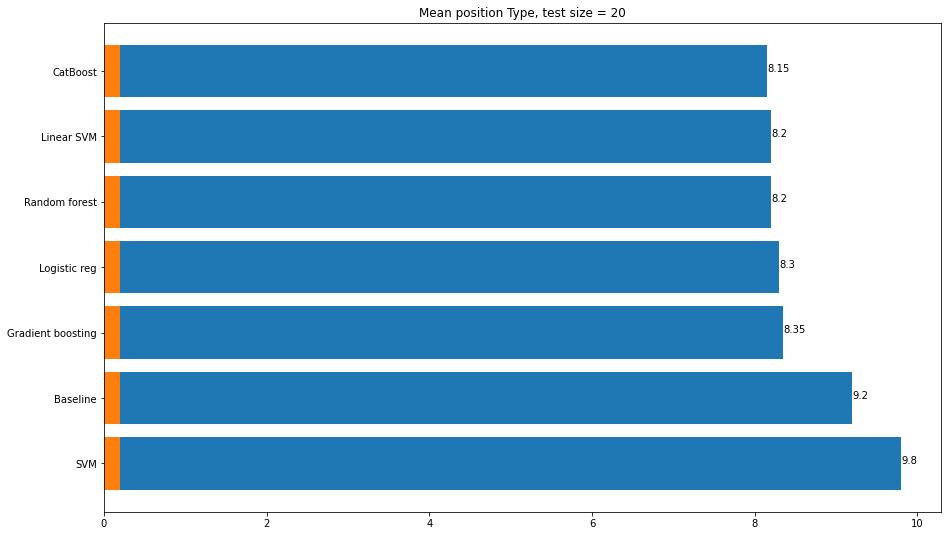

100
80
373
Method
Baseline
CatBoost
Random forest
Gradient boosting
SVM
Linear SVM
Logistic reg


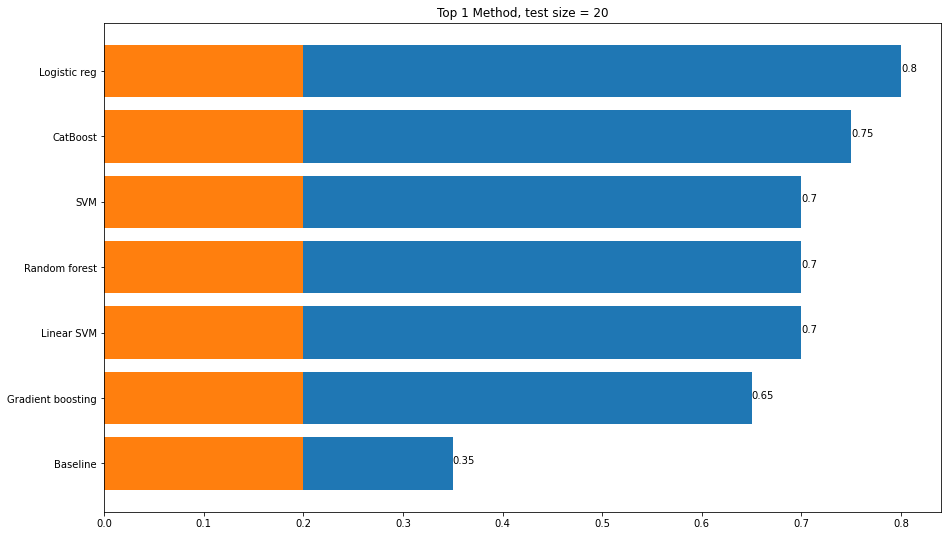

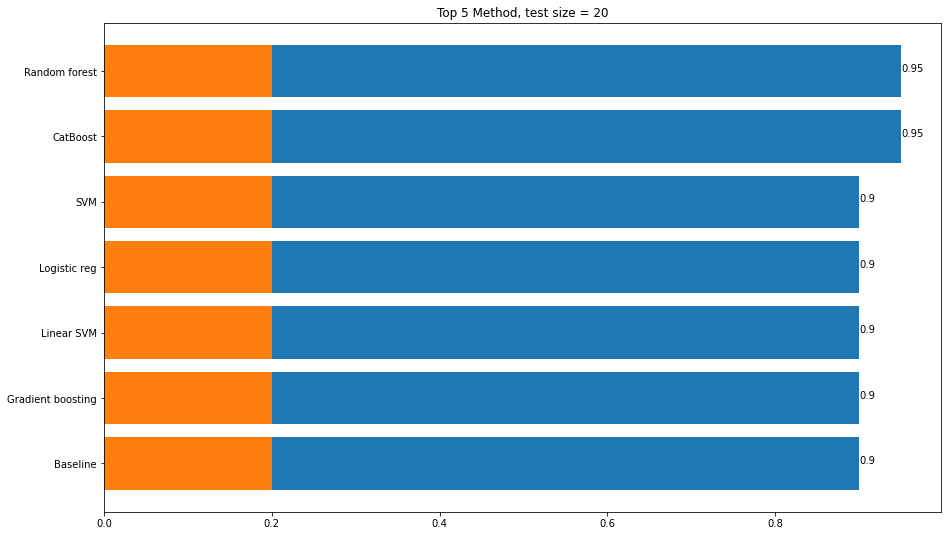

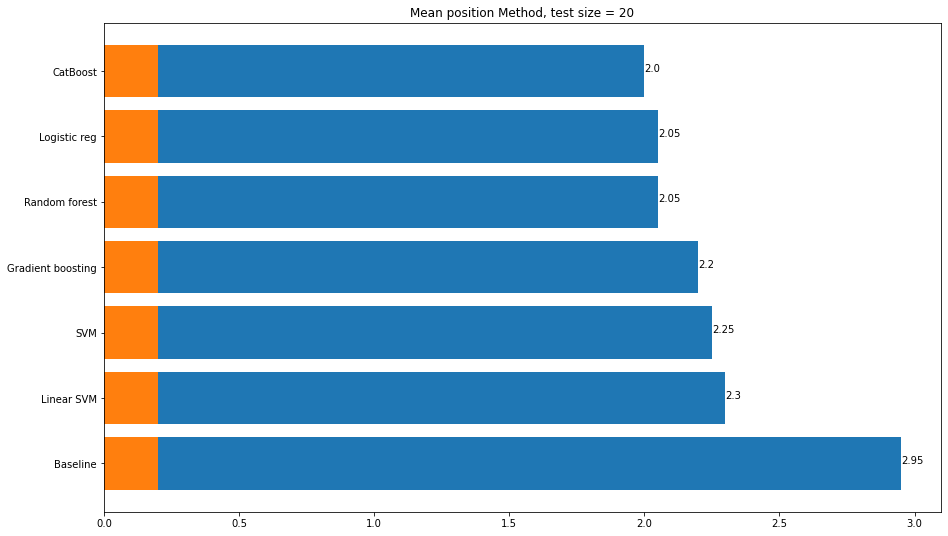

100
80
326
Field
Baseline
CatBoost


KeyboardInterrupt: 

In [7]:
def plot(models_names, metric, title, reverse=False):
    metric, models_names = zip(*sorted(zip(metric, models_names), reverse=reverse))
    plt.figure(figsize=(15, 9))
    pl = plt.barh(models_names, metric)
    plt.title(title)
    for bar in pl:
        width = bar.get_width()
        label_y = bar.get_y() + bar.get_height() / 2
        plt.text(width, label_y, s=f'{width}')
    plt.show()


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for target_type in usage_loader.usages_by_target:
        models_names = []
        top1 = []
        top5 = []
        mean = []
        train_size = 0.8
        X, y, feature_names = usage_loader.load_for_target(target_type,
                                                           size=100,
                                                           train_fraction=train_size,
                                                           need_polynomial=False)
        if len(X) < 4 or len(Counter(y)) == 1:
            continue
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=False)
        print(len(X))
        print(len(X_train))
        print(len(X[0]))
        print(target_type)
        models = [Baseline(), CatBoost(), RandomForest(), GradientBoosting(), SVM(), LinearSVM(), LogisticReg()]
        for model in models:
            print(model.name)
            metric = calculate(X_train, X_test, y_train, y_test, model)
            models_names.append(model.name)
            top1.append(metric.top_i(1))
            top5.append(metric.top_i(5))
            mean.append(metric.mean)
        plot(models_names, top1, f'Top 1 {target_type}, test size = {len(X_test)}')
        plot(models_names, top5, f'Top 5 {target_type}, test size = {len(X_test)}')
        plot(models_names, mean, f'Mean position {target_type}, test size = {len(X_test)}', reverse=True)

100
80
371
Type
Baseline
CatBoost


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Random forest
Gradient boosting
SVM
Linear SVM
Logistic reg
371
155
12090
860
100
80
860
Type
Baseline
CatBoost
Random forest
Gradient boosting
SVM
Linear SVM
Logistic reg


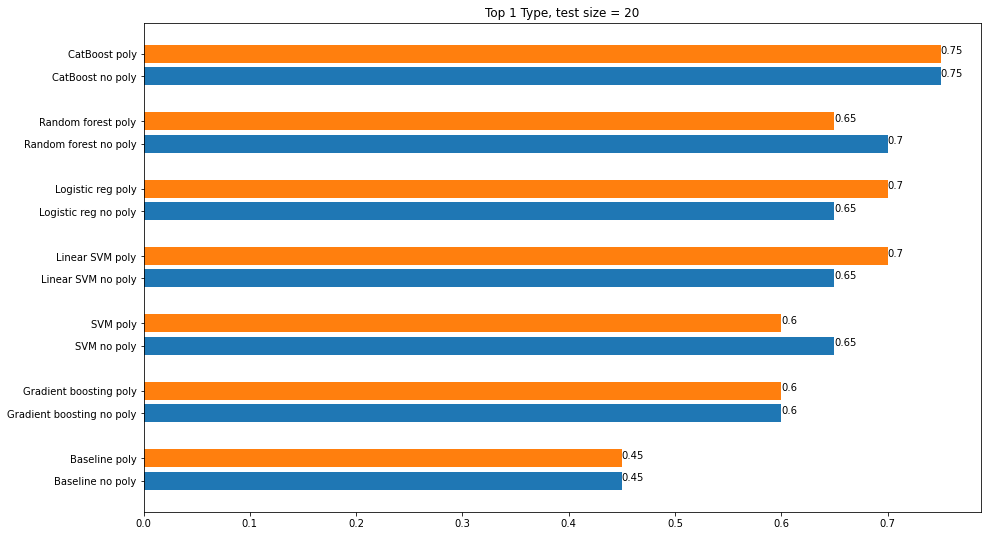

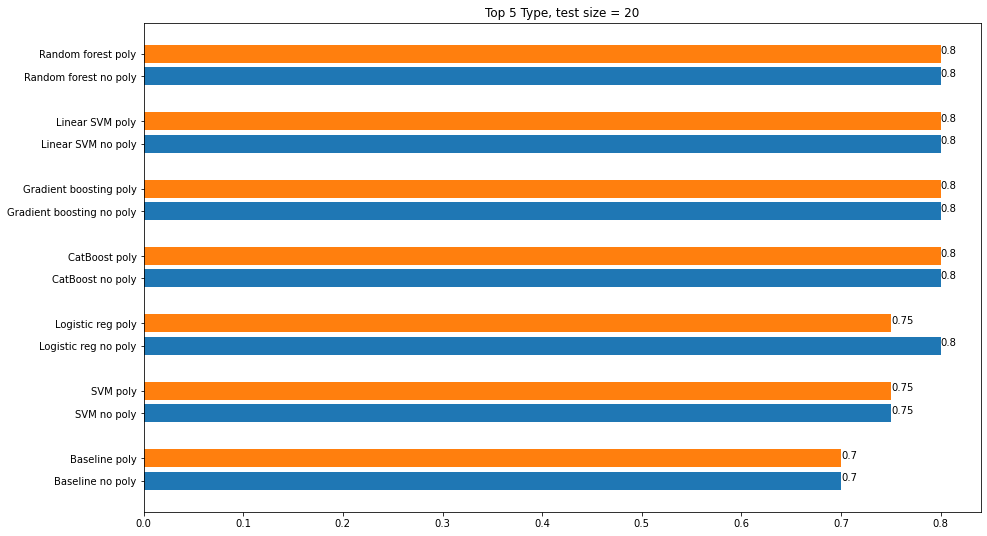

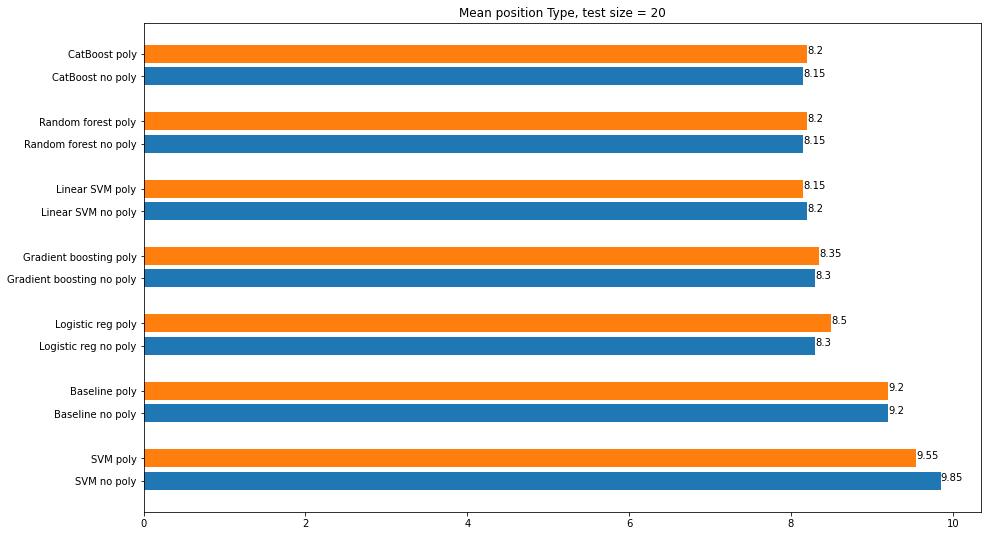

100
80
373
Method
Baseline
CatBoost
Random forest
Gradient boosting
SVM
Linear SVM
Logistic reg
373
241
29161
1914
100
80
1914
Method
Baseline
CatBoost


KeyboardInterrupt: 

In [15]:
def plot(models_names, metric1, metric1_label, metric2, metric2_label, title, reverse=False):
    metric1, metric2, models_names = zip(*sorted(zip(metric1, metric2, models_names), reverse=reverse))
    plt.figure(figsize=(15, 9))
    names = []
    for name in models_names:
        names.append(f'{name} {metric1_label}')
        names.append(f'{name} {metric2_label}')

    pl = plt.barh(list(range(1, 3 * len(metric1) + 1, 3)), metric1, label=metric1_label)
    for bar in pl:
        width = bar.get_width()
        label_y = bar.get_y() + bar.get_height() / 2
        plt.text(width, label_y, s=f'{width}')
    pl = plt.barh(list(range(2, 3 * len(metric1) + 1, 3)), metric2, label=metric2_label)
    for bar in pl:
        width = bar.get_width()
        label_y = bar.get_y() + bar.get_height() / 2
        plt.text(width, label_y, s=f'{width}')
    plt.title(title)
    idx = sorted(list(range(1, 3 * len(metric1) + 1, 3)) + list(range(2, 3 * len(metric1) + 1, 3)))
    plt.yticks(idx, names)
    plt.show()


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for target_type in usage_loader.usages_by_target:
        models_names = []
        top1 = []
        top5 = []
        mean = []
        top1_poly = []
        top5_poly = []
        mean_poly = []
        train_size = 0.8
        for need_poly in [False, True]:
            X, y, feature_names = usage_loader.load_for_target(target_type,
                                                               size=100,
                                                               train_fraction=train_size,
                                                               need_polynomial=need_poly)
            if len(X) < 4 or len(Counter(y)) == 1:
                continue
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=False)
            print(len(X))
            print(len(X_train))
            print(len(X[0]))
            print(target_type)
            models = [Baseline(), CatBoost(), RandomForest(), SVM(), LinearSVM(), LogisticReg()]
            for model in models:
                print(model.name)
                metric = calculate(X_train, X_test, y_train, y_test, model)
                if not need_poly:
                    models_names.append(model.name)
                    top1.append(metric.top_i(1))
                    top5.append(metric.top_i(5))
                    mean.append(metric.mean)
                else:
                    top1_poly.append(metric.top_i(1))
                    top5_poly.append(metric.top_i(5))
                    mean_poly.append(metric.mean)
        plot(models_names, top1, 'no poly', top1_poly, 'poly', f'Top 1 {target_type}, test size = {len(X_test)}')
        plot(models_names, top5, 'no poly', top5_poly, 'poly', f'Top 5 {target_type}, test size = {len(X_test)}')
        plot(models_names, mean, 'no poly', mean_poly, 'poly',
             f'Mean position {target_type}, test size = {len(X_test)}', reverse=True)